In [1]:
import pandas as pd

dataset = pd.read_csv("./train.csv")

In [2]:
dataset["YearOlds"] = 2024 - dataset["YearBuilt"]

<Axes: xlabel='YearOlds', ylabel='SalePrice'>

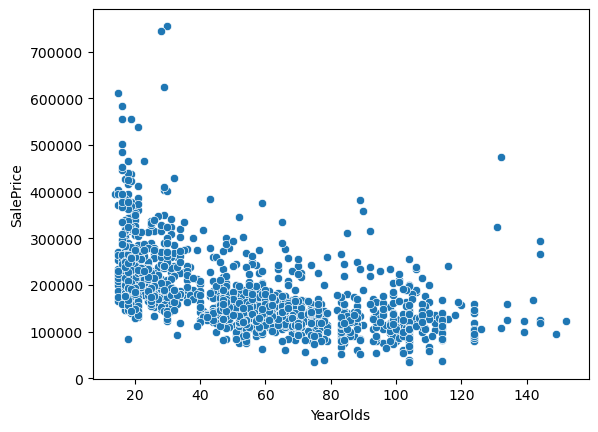

In [3]:
import seaborn as sns

sns.scatterplot(x='YearOlds', 
                y='SalePrice', data=dataset) 

In [4]:
import numpy as np
from sklearn.impute import SimpleImputer

## Select some fields
dataset = dataset[["LotArea", "YearOlds", "GarageCars", "GarageArea", "SalePrice"]]

## Split into X, y
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

print(X)

## Take care of missing values
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer.fit(X[:,:])

[[ 8450    21     2   548]
 [ 9600    48     2   460]
 [11250    23     2   608]
 ...
 [ 9042    83     1   252]
 [ 9717    74     1   240]
 [ 9937    59     1   276]]


SimpleImputer()

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train)

[[8400   67    1  294]
 [7837   31    2  380]
 [8777  114    0    0]
 ...
 [8172   69    2  572]
 [7642  106    1  216]
 [3684   17    3  660]]


In [6]:
from sklearn.linear_model import LinearRegression 

model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [7]:
predictions = model.predict(X_test)


print(model.predict([[8172, 69, 2,572]]))

[181743.13138859]


In [8]:
print(np.concatenate((predictions.reshape(len(predictions),1) , y_test.reshape(len(y_test),1)),1))

[[133174.15128791 154500.        ]
 [224440.0005188  325000.        ]
 [146755.30759066 115000.        ]
 [159839.1800979  159000.        ]
 [279239.90536677 315500.        ]
 [ 79599.54293662  75500.        ]
 [169237.36365938 311500.        ]
 [178553.95740781 146000.        ]
 [ 78847.2398695   84500.        ]
 [141246.11126585 135500.        ]
 [103229.98519322 145000.        ]
 [140337.33983454 130000.        ]
 [265598.20395756  81000.        ]
 [213604.79063117 214000.        ]
 [202551.25315965 181000.        ]
 [125219.09646445 134500.        ]
 [203555.05724762 183500.        ]
 [128528.04938138 135000.        ]
 [108021.46947936 118400.        ]
 [215714.98930743 226000.        ]
 [182263.84680796 155000.        ]
 [226567.83269049 210000.        ]
 [212933.47932047 173500.        ]
 [128837.31512212 129000.        ]
 [219789.19228281 192000.        ]
 [203179.6089667  153900.        ]
 [202784.42355724 181134.        ]
 [179170.97191079 141000.        ]
 [204729.12347158 18

In [9]:
from joblib import dump, load

# Assuming `model` is your trained model
dump(model, 'model.joblib')

['model.joblib']